In [1]:
import sys, os, json
import numpy as np
import pandas as pd
import seaborn as sns
import argparse, progressbar
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes

sns.set()

In [17]:
# import the necessary packages
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

##
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, load_model, Sequential

In [3]:
(train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(num_words=10_000)

17465344/17464789 [==============================] - 3s 0us/step


C:\Users\mhasa\PycharmProjects\venvs\dl_venv\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\mhasa\PycharmProjects\venvs\dl_venv\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [8]:
len(train_data[3])

550

In [13]:
word_index = datasets.imdb.get_word_index()  # dict of word to index
id_to_word = {val: key for key, val in word_index.items()}


def construct_review(word_indices: list):
    words = []
    for index in word_indices:
        words.append(id_to_word.get(index - 3, "?"))
    review = " ".join(words)
    return review

In [14]:
construct_review(train_data[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [15]:
# one hot encode the data so all reviews are the same length
def vectorize_sequences(sequences, dimension=10_000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [16]:
# vectorize the data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [26]:
model = Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [27]:
# train test separation
x_val = x_train[:10_000]
partial_x_train = x_train[10_000:]

y_val = train_labels[:10_000]
partial_y_train = train_labels[10_000:]

In [28]:
# train the model
n_epochs = 4
H = model.fit(partial_x_train,
              partial_y_train,
              epochs=n_epochs,
              batch_size=512,
              validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 193us/sample - loss: 0.5010 - accuracy: 0.7974 - val_loss: 0.3992 - val_accuracy: 0.8445
Epoch 2/4
15000/15000 [==============================] - 2s 146us/sample - loss: 0.3028 - accuracy: 0.9014 - val_loss: 0.2997 - val_accuracy: 0.8890
Epoch 3/4
15000/15000 [==============================] - 2s 119us/sample - loss: 0.2196 - accuracy: 0.9285 - val_loss: 0.2769 - val_accuracy: 0.8924
Epoch 4/4
15000/15000 [==============================] - 2s 135us/sample - loss: 0.1738 - accuracy: 0.9443 - val_loss: 0.2716 - val_accuracy: 0.8921


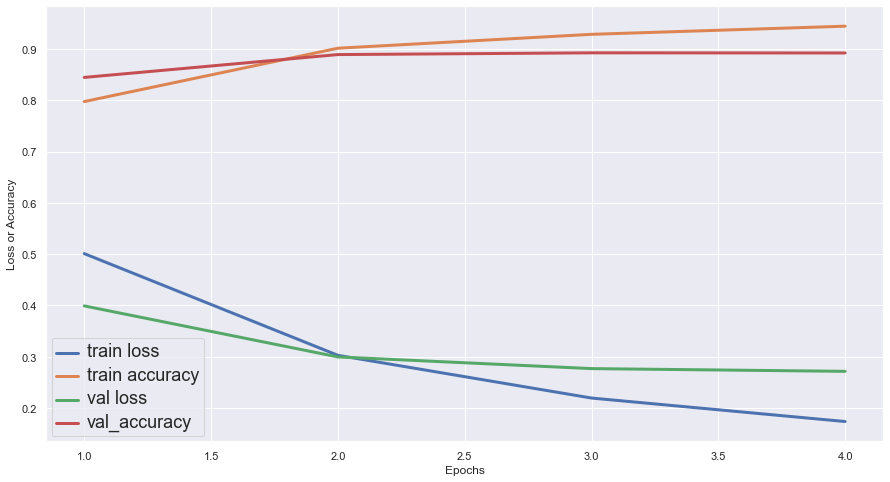

In [29]:
# evaluate the network

# plot the performance
epochs = range(1, n_epochs + 1)
loss = H.history['loss']
accuracy = H.history['accuracy']
val_loss = H.history['val_loss']
val_accuracy = H.history['val_accuracy']
plot_df = pd.DataFrame(data=np.c_[epochs, loss, accuracy, val_loss, val_accuracy],
                       columns=['epochs', 'loss', 'accuracy', 'val_loss', 'val_accuracy'])

# do the actual plots
sns.set(font_scale=1)
f, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.lineplot(data=plot_df, x='epochs', y='loss', ax=ax, label='train loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='accuracy', ax=ax, label='train accuracy', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_loss', ax=ax, label='val loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_accuracy', ax=ax, label='val_accuracy', linewidth=3)
ax.set_ylabel('Loss or Accuracy')
ax.set_xlabel('Epochs')
plt.setp(ax.get_legend().get_texts(), fontsize='18');  # for legend text

In [30]:
test_results = model.evaluate(x_test, test_labels)
test_results

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.29185888108253477, 0.88272]